# Heart Stroke Analysis 

A)Source :https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

B)Content :

This is the data set which is used to predict whether patient is likely to get stroke based on the input parameters like gender , age , various diseases , and smoking status.

ID : This defines the identity numbner of the patient 

Gender : This defines the patient is male or female .

Age : Thus defines the age of the patient.

Hypertension : This defines the patient is having high blood pressure or not.

Heart disease : This defines the patient is suffering from the heart disease or not.

Ever married : This defines the patient the married or unmarried .

Work type : This defines the patient work occupation.

Residence type : This defines the patient living area.

Average glucose level : This define the glucose level of the particular patient .

BMI : This refers to boday mass index of the patient.

Smoking status : This define the patient is smoker or not.

Stroke : This define the patient which suffered from the stroke.

C)Procedure :
1.Importing necessary libraries
2.Importing data set
3.Data Cleaning
4.Analysis of the data set.
5.Conclusion of the data set.

In [1]:
#importing Required library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
#importing plotly Library
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

In [3]:
#importing the data base

df=pd.read_csv(r"C:\Users\prash\healthcare-dataset-stroke-data.csv")
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# Deleting the unnecessary data
del df["id"]

In [7]:
# Duplicates values
df.duplicated().sum()

0

In [8]:
#checking the NaN values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df.dropna(how='any',inplace=True)

In [10]:
 #checking the NaN values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:>

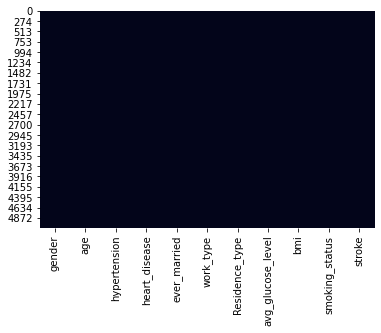

In [11]:
sns.heatmap(df.isnull(), cbar=False)

In [12]:
 #Reading Column Names
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

The max heart stroke patients are married


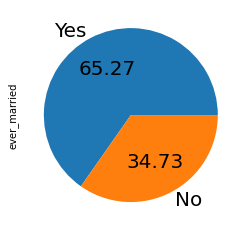

In [13]:
df.ever_married.value_counts().plot.pie(fontsize = 20, autopct = '%.2f')
print('The max heart stroke patients are married')

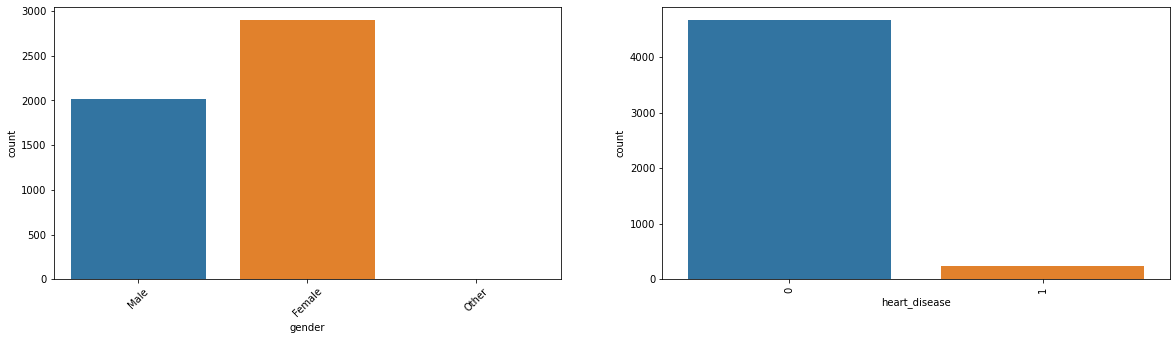

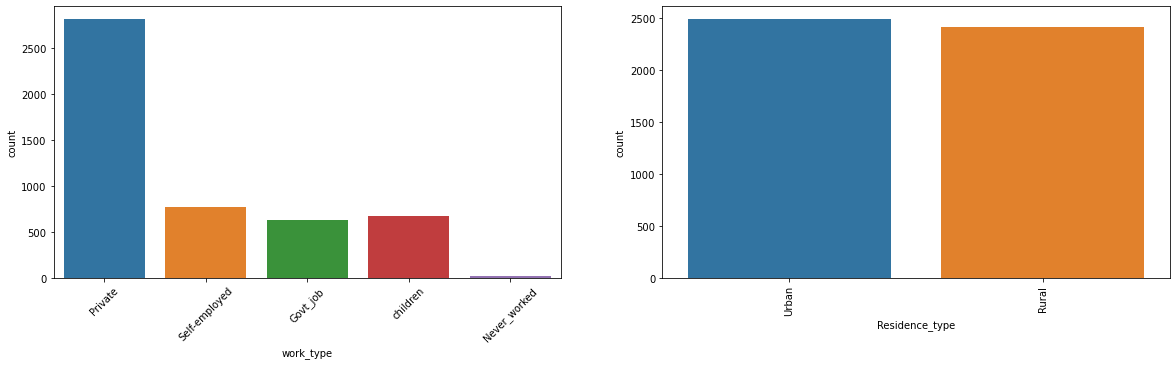

In [14]:
cat_cols = ['gender','heart_disease','work_type','Residence_type']
i=0
while i < 4:
    fig = plt.figure(figsize=[20,5])
    
    
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=45)
    i += 1
    
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=90)
    i += 1
    
    plt.show()

The listing of female count is more for heart stroke.
Private sector jobs people are most affected than other work type.
The listing of the people are from the urban areas are high.

In [15]:
df.smoking_status.value_counts().head().iplot(kind="bar")

The people who never smoke have high listing count 

In [16]:
# Smoking status and high blood pressure levels of the patients
df[['smoking_status','hypertension']].value_counts().reset_index()

smoking_status  hypertension     0
0     never smoked             0  1636
1          Unknown             0  1440
2  formerly smoked             0   727
3           smokes             0   655
4     never smoked             1   216
5  formerly smoked             1   110
6           smokes             1    82
7          Unknown             1    43

In [17]:
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4909.000000   4909.000000    4909.000000        4909.000000   
mean     42.865374      0.091872       0.049501         105.305150   
std      22.555115      0.288875       0.216934          44.424341   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.070000   
50%      44.000000      0.000000       0.000000          91.680000   
75%      60.000000      0.000000       0.000000         113.570000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  4909.000000  
mean     28.893237     0.042575  
std       7.854067     0.201917  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000

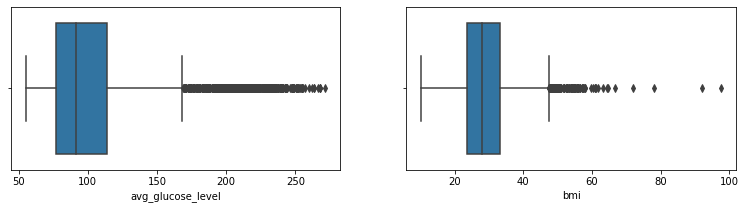

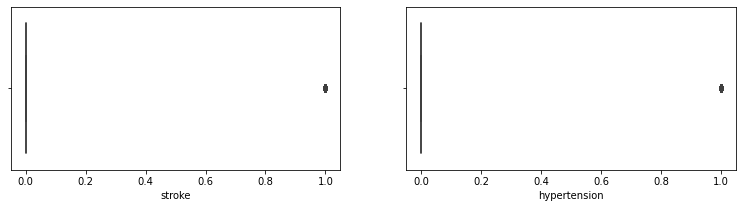

In [18]:
num_cols = ['avg_glucose_level','bmi','stroke','hypertension']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

Out liers are less in data set

In [19]:
# Converting the float value to int
df['age'] = df['age'].astype(int)

In [20]:
df.sort_values(ascending=False,by="bmi").head(10)

gender  age  hypertension  heart_disease ever_married      work_type  \
2128    Male   17             1              0           No        Private   
4209    Male   38             1              0          Yes        Private   
928   Female   23             1              0           No        Private   
544     Male   42             0              0          Yes        Private   
1559  Female   53             0              0          Yes        Private   
358     Male   52             0              0          Yes  Self-employed   
4188  Female   27             0              0          Yes        Private   
2764  Female   24             0              0          Yes        Private   
3825  Female   52             0              0          Yes        Private   
2840  Female   52             0              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
2128          Rural              61.67  97.6        Unknown       0  
4209          Rural              56.90  92.0   never smoked       0  
928           Urban              70.03  78.0         smokes       0  
544           Rural             210.48  71.9   never smoked       0  
1559          Rural              72.63  66.8        Unknown       0  
358           Urban              78.40  64.8   never smoked       0  
4188          Rural              57.96  64.4   never smoked       0  
2764          Urban              85.55  63.3   never smoked       0  
3825          Rural             118.46  61.6         smokes       0  
2840          Urban              98.27  61.2        Unknown       0

The person with highest bmi is male of age 17 and has highest weight too.

In [21]:
df.sort_values(ascending=True,by="bmi").head(10)

gender  age  hypertension  heart_disease ever_married      work_type  \
1609  Female    1             0              0           No       children   
3307  Female   79             0              0          Yes  Self-employed   
2187    Male   40             0              0          Yes        Private   
657   Female    4             0              0           No       children   
922   Female    8             0              0           No       children   
3319  Female    1             0              0           No       children   
3968    Male    0             0              0           No       children   
3619  Female    4             0              0           No       children   
4694  Female    1             0              0           No       children   
1701    Male    8             0              0           No       children   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
1609          Rural             122.04  10.3        Unknown       0  
3307          Urban              79.03  11.3        Unknown       0  
2187          Rural              60.96  11.5   never smoked       0  
657           Urban             107.25  12.0        Unknown       0  
922           Urban             106.51  12.3        Unknown       0  
3319          Urban             159.39  12.8        Unknown       0  
3968          Rural              69.79  13.0        Unknown       0  
3619          Urban              61.54  13.2        Unknown       0  
4694          Urban              86.00  13.3        Unknown       0  
1701          Rural              91.54  13.4        Unknown       0

The person with low bmi is girl child of one year old.

In [22]:
 glucose_level=pd.crosstab(df['work_type'],df['avg_glucose_level'])
glucose_level.iplot(kind="bar",barmode = "stack")

The private work type has highest glucose levels with 250.8 mg/dL.

In [23]:
df1 = df.groupby('smoking_status').sum()
df1 = df.sort_values(['bmi'],ascending=False)
df1.head(10)

gender  age  hypertension  heart_disease ever_married      work_type  \
2128    Male   17             1              0           No        Private   
4209    Male   38             1              0          Yes        Private   
928   Female   23             1              0           No        Private   
544     Male   42             0              0          Yes        Private   
1559  Female   53             0              0          Yes        Private   
358     Male   52             0              0          Yes  Self-employed   
4188  Female   27             0              0          Yes        Private   
2764  Female   24             0              0          Yes        Private   
3825  Female   52             0              0          Yes        Private   
2840  Female   52             0              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
2128          Rural              61.67  97.6        Unknown       0  
4209          Rural              56.90  92.0   never smoked       0  
928           Urban              70.03  78.0         smokes       0  
544           Rural             210.48  71.9   never smoked       0  
1559          Rural              72.63  66.8        Unknown       0  
358           Urban              78.40  64.8   never smoked       0  
4188          Rural              57.96  64.4   never smoked       0  
2764          Urban              85.55  63.3   never smoked       0  
3825          Rural             118.46  61.6         smokes       0  
2840          Urban              98.27  61.2        Unknown       0

The persons who never smoked has high bmi index and has got stroke 84 times.

In [24]:
px.line(df, x = 'Residence_type' , y = 'stroke', color = 'ever_married', title = 'Residence type v/s stroke')

The married people of rural areas are prone to heart stroke.

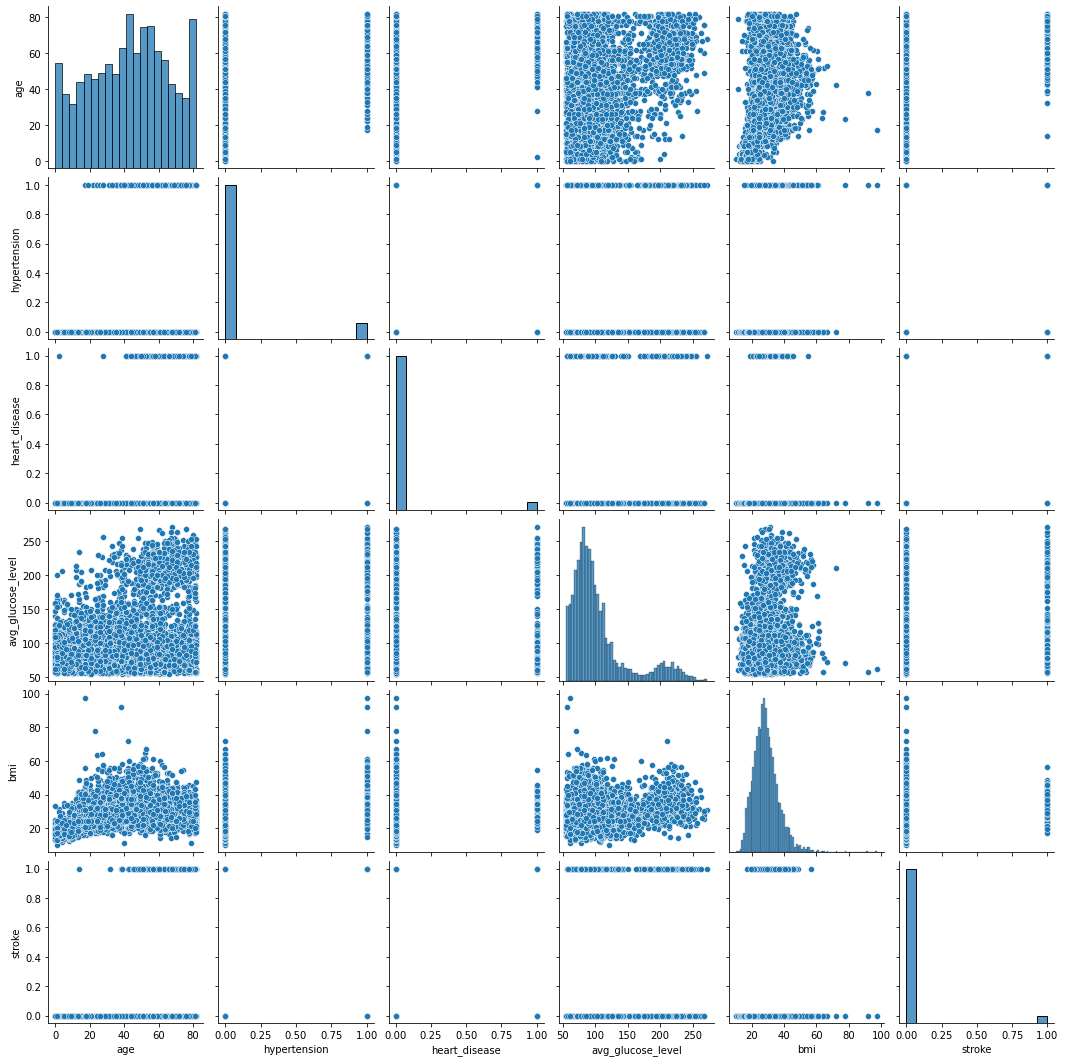

In [25]:
sns.pairplot(df) 

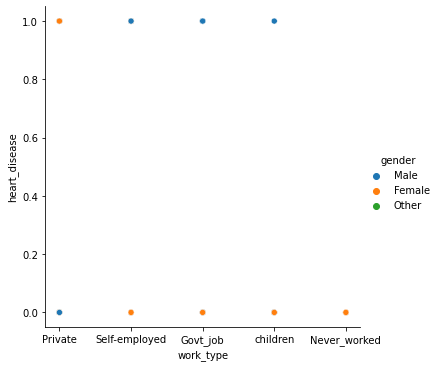

In [26]:
sns.relplot(x=df.work_type,y=df.heart_disease,hue=df.gender)

In private work type female has more heart disease.
In remaining other sectors male has high heart disease.

In [27]:
df.avg_glucose_level.value_counts().sort_values(ascending=False).iplot(kind="bar")

The max average glucose count is 6 mg/dL .

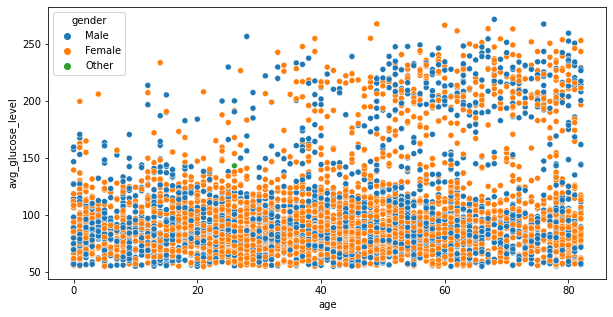

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="age",y='avg_glucose_level',hue='gender',data=df)
plt.show()

The male has highest avg glucose level of age between 60-80.

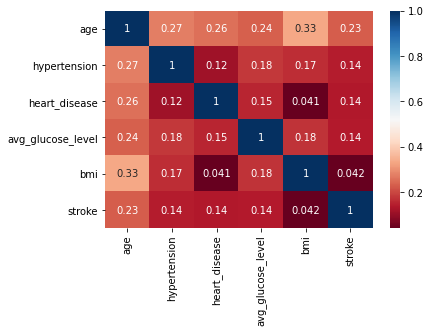

In [29]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

The relation between dat sets is positive but max data set are low positive correlated.

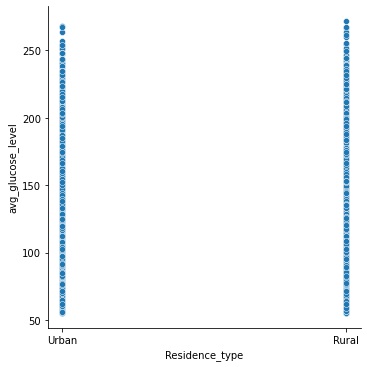

In [30]:
sns.relplot(x=df.Residence_type,y=df.avg_glucose_level)

Rural areas people has high glucose level.

# Conclusion

1.The max heart stroke patients are married.
2.The listing of female count is more for heart stroke.
3.Private sector jobs people are most affected than other work type.
4.The person with highest bmi is male of age 17 and has highest weight too.
5.The person with low bmi is girl child of one year old.
6.The private work type has highest glucose levels with 250.8 mg/dL
7.The married people of rural areas are prone to heart stroke.
8.The persons who never smoked has high bmi index and has got stroke 84 times.
9.In private work type female has more heart disease while comparing to other sectors.
10.The max average glucose count is 6 mg/dL .
11.The male has highest avg glucose level of age between 60-80.
12.The relation between dat sets is positive but max data set are low positive correlated.
13.Rural areas people has high glucose level.